## Google Playstore Apps Raiting Prediction

In [44]:
# Data
import numpy as np
import pandas as pd
from collections import defaultdict

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Read the cleaned CSV file
df = pd.read_csv(r"./data/Google-Playstore-Dataset-Clean.csv")
print(df.head())

   ID   App Name           Category  Rating  Rating Count  Installs  \
0   1    Gakondo          Adventure     0.0           0.0        10   
1   2     Vibook       Productivity     0.0           0.0        50   
2   3     IMOCCI             Social     0.0           0.0        50   
3   4  WhatsOpen      Communication     0.0           0.0        10   
4   5    Parents  Maps & Navigation     0.0           0.0       100   

   Minimum Installs  Maximum Installs  Free  Size Minimum Android  \
0              10.0                15  True   10M      7.1 and up   
1              50.0                58  True  3.7M    4.0.3 and up   
2              50.0                89  True   46M      6.0 and up   
3              10.0                18  True  1.3M      4.4 and up   
4             100.0               330  True  2.7M      4.0 and up   

       Released  Last Updated Content Rating Installs_Category  
0  Feb 26, 2020  Feb 26, 2020       Everyone                 0  
1   Aug 9, 2019  Aug 19, 201

Codification of categorical variables and data splitting for modeling


In [20]:
df['RatingType'] = 'NoRating'
df.loc[(df['Rating Count'] > 0) & (df['Rating Count'] <= 10000.0),'RatingType'] = 'Less than 10K'
df.loc[(df['Rating Count'] > 10000) & (df['Rating Count'] <= 500000.0),'RatingType'] = 'Between 10K and 500K'
df.loc[(df['Rating Count'] > 500000) & (df['Rating Count'] <= 138557570.0),'RatingType'] = 'More than 500K'
df.RatingType.value_counts()

RatingType
NoRating                105836
Less than 10K           101395
Between 10K and 500K      1632
More than 500K              93
Name: count, dtype: int64

In [36]:
df['Category'] = pd.factorize(df['Category'])[0].astype(int)
df['RatingType'] = pd.factorize(df['RatingType'])[0].astype(int)
df['Content Rating'] = pd.factorize(df['Content Rating'])[0].astype(int)
df['Minimum Android'] = pd.factorize(df['Minimum Android'])[0].astype(int)
df['Installs_Category'] = pd.factorize(df['Installs_Category'])[0].astype(int)

In [39]:
X = df.drop(['ID', 'App Name','Size', 'Minimum Installs', 'Released','Rating Count' ,'Maximum Installs','Minimum Android', 'Last Updated','Rating','RatingType', 'Installs_Category'],axis=1)
y = df['RatingType'].values

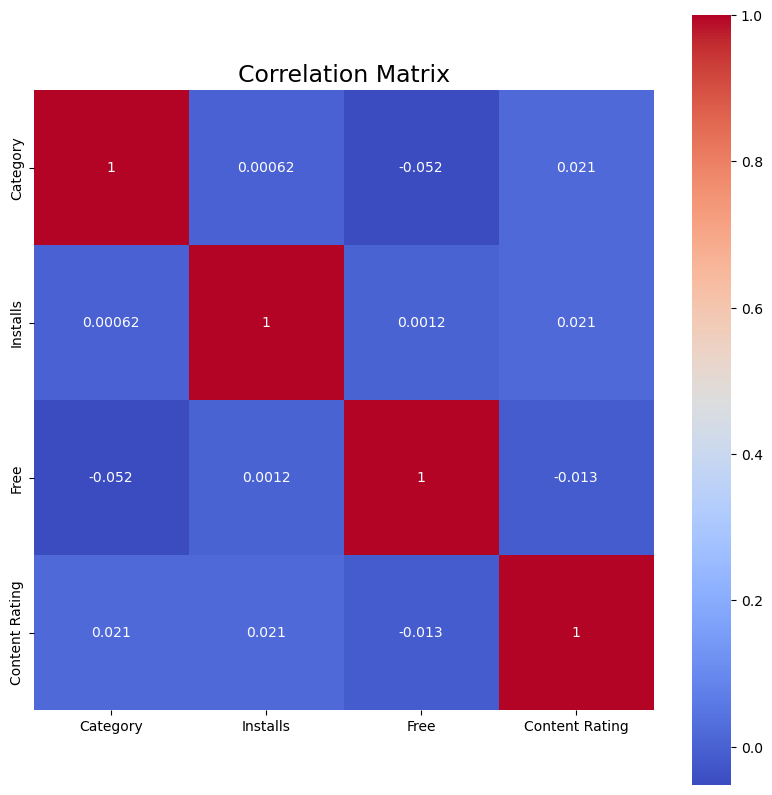

In [40]:
corr = X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="coolwarm",square=True, annot=True)
plt.title("Correlation Matrix", fontsize = '17');#

In [41]:
scaler = StandardScaler()
X['Installs'] = scaler.fit_transform(X[['Installs']])

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=20)

X_train.shape,X_test.shape,y_train.shape,y_test.shape


((146269, 4), (62687, 4), (146269,), (62687,))

Accuracy = 81.72 %


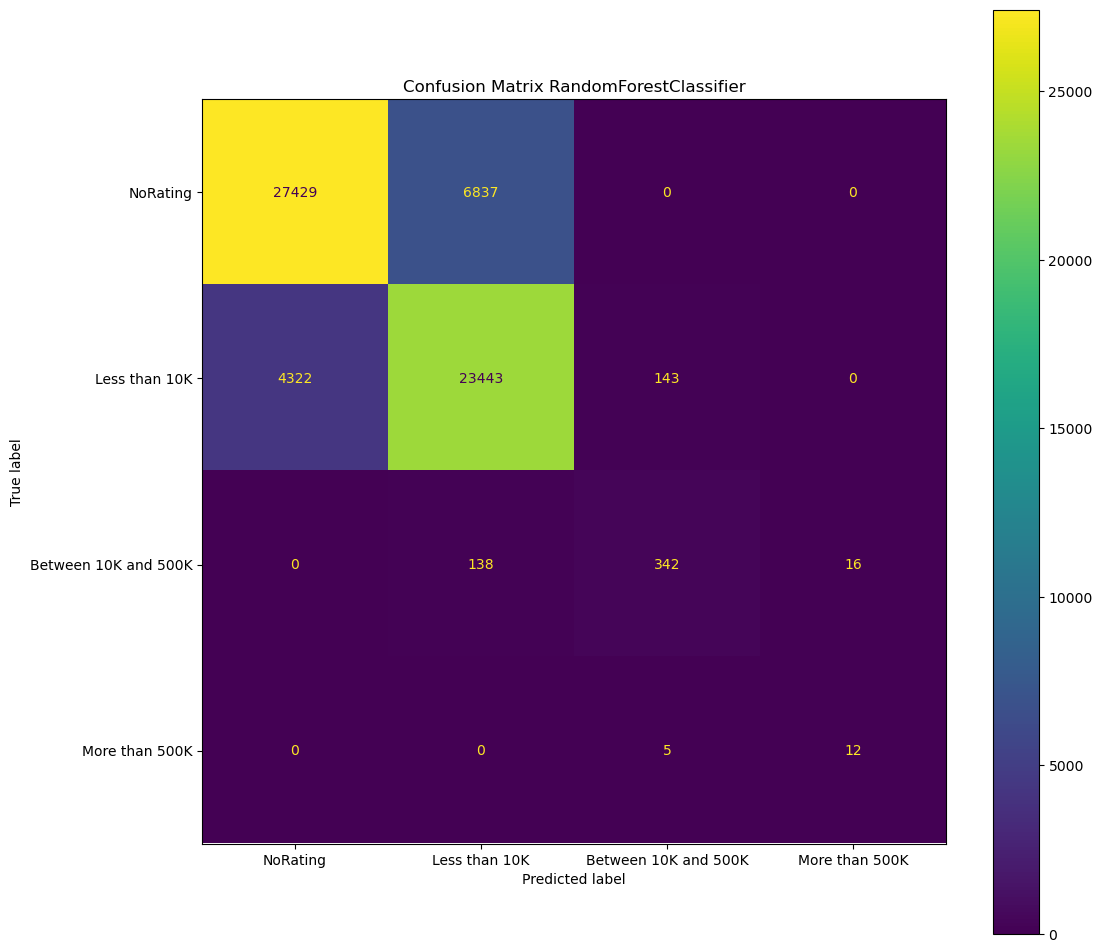

In [43]:
# A simple RandomForestClassifier without any parameter tuning
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_pred,y_test)*100
print("Accuracy =",round(rf_acc,2),"%")
cm = confusion_matrix(y_pred,y_test)

cmd = ConfusionMatrixDisplay(cm,display_labels =['NoRating','Less than 10K','Between 10K and 500K','More than 500K'])
fig, ax = plt.subplots(figsize=(12,12));
plt.title("Confusion Matrix RandomForestClassifier")
cmd.plot(ax=ax);

In [45]:
target_names = ['NoRating','Less than 10K','Between 10K and 500K','More than 500K']
cr = classification_report(y_test,y_pred,target_names = target_names)
print("Classification Report for RandomForestClassifier")
print(cr)

Classification Report for RandomForestClassifier
                      precision    recall  f1-score   support

            NoRating       0.80      0.86      0.83     31751
       Less than 10K       0.84      0.77      0.80     30418
Between 10K and 500K       0.69      0.70      0.69       490
      More than 500K       0.71      0.43      0.53        28

            accuracy                           0.82     62687
           macro avg       0.76      0.69      0.72     62687
        weighted avg       0.82      0.82      0.82     62687

